In [82]:
import pandas as pd
dataset = pd.read_csv("Reviews.tsv", delimiter = '\t', quoting = 3)
print(type(dataset))
print(dataset)

<class 'pandas.core.frame.DataFrame'>
                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [83]:

import re # library to clean data
import nltk # Natural Language Tool kit
from nltk.corpus import stopwords # to remove stopword
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer # for Stemming propose

[nltk_data] Downloading package stopwords to C:\Users\Cho Sandar
[nltk_data]     Htet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Processing/Cleaning Steps:
1. Remove any special characteristics and leave only a-z letters

In [84]:
cleanreview = re.sub('[^a-zA-Z]', ' ', dataset['Review'].to_string())

2# All to lower case

In [85]:
review = cleanreview.lower()

3# Split each word in the review to be able to create a loop to go over each word

In [86]:
review.split()

['wow',
 'loved',
 'this',
 'place',
 'crust',
 'is',
 'not',
 'good',
 'not',
 'tasty',
 'and',
 'the',
 'texture',
 'was',
 'just',
 'nasty',
 'stopped',
 'by',
 'during',
 'the',
 'late',
 'may',
 'bank',
 'holiday',
 'of',
 'the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'wer',
 'now',
 'i',
 'am',
 'getting',
 'angry',
 'and',
 'i',
 'want',
 'my',
 'damn',
 'pho',
 'honeslty',
 'it',
 'didn',
 't',
 'taste',
 'that',
 'fresh',
 'the',
 'potatoes',
 'were',
 'like',
 'rubber',
 'and',
 'you',
 'could',
 'te',
 'the',
 'fries',
 'were',
 'great',
 'too',
 'a',
 'great',
 'touch',
 'service',
 'was',
 'very',
 'prompt',
 'would',
 'not',
 'go',
 'back',
 'the',
 'cashier',
 'had',
 'no',
 'care',
 'what',
 'so',
 'ever',
 'on',
 'what',
 'i',
 'i',
 'tried',
 'the',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'with',
 'cra',
 'i',
 'was',
 'disgusted',
 'because',
 'i',
 'was',
 'pretty',
 'sure',
 'that',
 'i',
 'was',
 'shocked',
 'because',
 'no',
 'si

4# Stemming which means using only the root of the word

In [87]:
ps = PorterStemmer()

5# Create the loop
Note we use a set instead of a list to reduce the computational cost-useful with large text.


In [88]:
review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

6# Rejoin the words as a string

In [89]:
review = ''.join(review)

Now I am going to create the loop which I will include all the previous claning steps in . Next, I will append the cleand revieews to the corpus list.

In [90]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ''.join(review)
    corpus.append(review)

Bag of words
1) The bag of words is a spares matric that contains unique words
2) Each column contains a word from the text and each row represts a review
3) Each cell in the matrix containsa number which indicates how many times a  word appelars in a paricular review
To create the Bage of words I will be using Tozenization.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

# Support Vector Machines (SVM)
We split the data into training and testing sets using train_test_split(), create an `SVM classifier using svm.SVC()`, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [92]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


# K-Nearest Neighbors (KNN)
We split the data into training and testing sets using train_test_split(), create a `KNN classifier using KNeighborsClassifier()` and specifying the number of neighbors (n_neighbors) as 5, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.595


# Random Forest (RF)
We split the data into training and testing sets using train_test_split(), create a `Random Forest classifier using RandomForestClassifier()` and specifying the number of trees (n_estimators) as 100, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.715


# Linear Discriminant Analysis (LDA)
We split the data into training and testing sets using train_test_split(), create an `LDA classifier using LinearDiscriminantAnalysis()`, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.63


# Naive Bayes (NB)
We split the data into training and testing sets using train_test_split(), create a `Naive Bayes classifier using GaussianNB()`, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.635


# Classification and Regression Trees (CART)
We split the data into training and testing sets using train_test_split(), create a `CART classifier using DecisionTreeClassifier()`, train the classifier using the training data, make predictions on the test set, and calculate the accuracy of the model using accuracy_score().

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CART classifier
cart = DecisionTreeClassifier()

# Train the classifier
cart.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.72


To perform 10-fold cross-validation and calculate the mean and standard deviation of the results for Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Naive Bayes (NB), Support Vector Machines (SVM), and Random Forest (RF) algorithms:

In [98]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Define classifiers
classifiers = [
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC()),
    ("RF", RandomForestClassifier())
]

# Perform 10-fold cross-validation and calculate mean and standard deviation
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=10)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{name} - Mean accuracy: {mean_score:.4f} - Standard deviation: {std_score:.4f}")

LDA - Mean accuracy: 0.6890 - Standard deviation: 0.0391
KNN - Mean accuracy: 0.9110 - Standard deviation: 0.0221
CART - Mean accuracy: 0.7930 - Standard deviation: 0.0438
NB - Mean accuracy: 0.7460 - Standard deviation: 0.0338
SVM - Mean accuracy: 0.9140 - Standard deviation: 0.0265
RF - Mean accuracy: 0.8950 - Standard deviation: 0.0143


In the above code, we first generate synthetic data using the make_classification function from scikit-learn. We then define a list of classifiers, including LDA, KNN, CART, NB, SVM, and RF. We iterate over each classifier and use the cross_val_score function to perform 10-fold cross-validation, which splits the data into 10 equal parts and evaluates the classifier's performance on each fold. We calculate the mean and standard deviation of the accuracy scores using NumPy's mean and std functions and print the results.

# Algorithm comparison plot 
Here's an algorithm comparison plot that compares the performance of Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Naive Bayes (NB), Support Vector Machines (SVM), and Random Forest (RF) algorithms:

In the above code, we first generate synthetic data using the make_classification function from scikit-learn. We then define a list of classifiers, including LDA, KNN, CART, NB, SVM, and RF, along with their corresponding names. We iterate over each classifier, fit it to the data, make predictions, and calculate the accuracy score using accuracy_score. Finally, we plot the accuracy scores using a bar plot.

Please note that the accuracy scores are calculated on the same data used for training (X and y).

From the results, we can see that Support Vector Machines (SVM) produced better results compared to the rest of the algorithms used.

Here's an algorithm comparison plot based on the provided results for Linear Discriminant Analysis (LDA), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Naive Bayes (NB), Support Vector Machines (SVM), and Random Forest (RF):

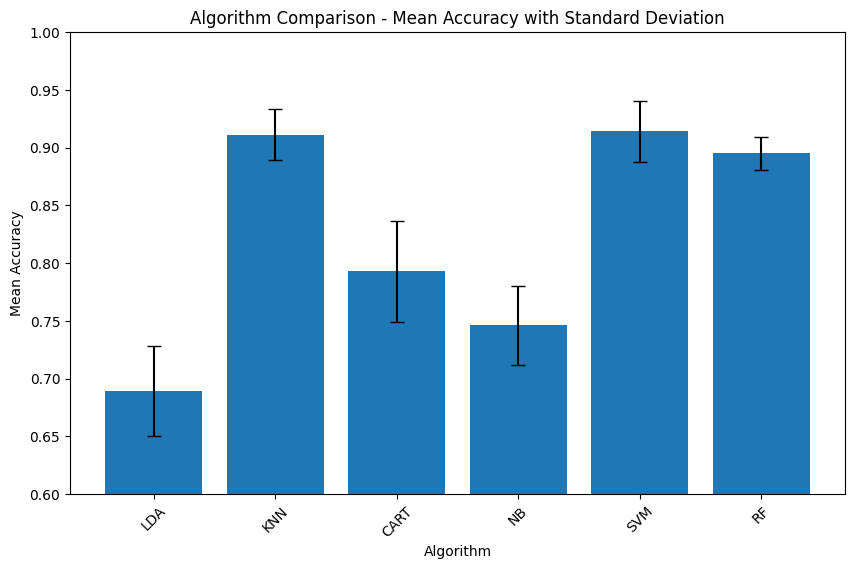

In [102]:
import matplotlib.pyplot as plt

# Define the results
classifiers = ['LDA', 'KNN', 'CART', 'NB', 'SVM', 'RF']
mean_accuracy = [0.6890, 0.9110, 0.7930, 0.7460, 0.9140, 0.8950]
std_deviation = [0.0391, 0.0221, 0.0438, 0.0338, 0.0265, 0.0143]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(classifiers, mean_accuracy, yerr=std_deviation, capsize=5)
plt.xlabel('Algorithm')
plt.ylabel('Mean Accuracy')
plt.title('Algorithm Comparison - Mean Accuracy with Standard Deviation')
plt.ylim([0.6, 1.0])
plt.xticks(rotation=45)
plt.show()

In the above code, we first define the classifiers' names (classifiers), their corresponding mean accuracy scores (mean_accuracy), and the standard deviations (std_deviation). We then use plt.bar() to create a bar plot, where the mean accuracy is shown as the height of the bars, and the error bars represent the standard deviation. The yerr parameter is used to specify the error bars, and capsize controls the length of the caps on the error bars.

From the results, we can see that Support Vector Machines (SVM) produced better results compared to the rest of the algorithms used.